In [56]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data

help(load_data)

Help on function load_data in module keras.src.datasets.cifar10:

load_data()
    Loads the CIFAR10 dataset.
    
    This is a dataset of 50,000 32x32 color training images and 10,000 test
    images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | airplane    |
    |   1   | automobile  |
    |   2   | bird        |
    |   3   | cat         |
    |   4   | deer        |
    |   5   | dog         |
    |   6   | frog        |
    |   7   | horse       |
    |   8   | ship        |
    |   9   | truck       |
    
    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(50000, 32, 32, 3)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **`y_train`**: `uint8` NumPy array of l

In [57]:
(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [58]:

x_train.shape

(50000, 32, 32, 3)

In [59]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [60]:
y_train, y_test = y_train.ravel(), y_test.ravel()

In [61]:
y_train.shape

(50000,)

In [62]:
labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

labels_dict = {i: label for i, label in enumerate(labels)}
labels_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

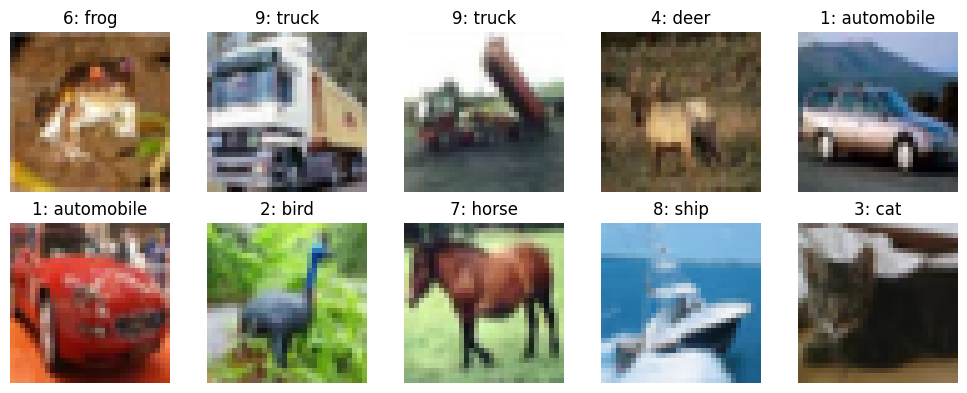

In [63]:
fig, axes = plt.subplots(2,5, figsize=(10,4))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")
    

fig.tight_layout()

In [64]:
x_train[i].shape

(32, 32, 3)

In [65]:
x_train[1].flatten().min(), x_train[1].flatten().max()

(5, 254)

In [66]:
scaled_X_train = x_train.astype("float32") / 255
scaled_X_test = x_test.astype("float32") / 255

scaled_X_train.flatten().min(), scaled_X_train.flatten().max()


(0.0, 1.0)

##  CNN model

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


def cnn_model(learning_rate=0.001, dropout_rate=0.5, kernels=[32, 64]):
    # optimizer which is used for learning
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name="CNN_model")

    # convolutional and subsampling layers
    for kernel in kernels:
        conv_layer = Conv2D(
            kernel,  # number of kernels in each layer
            kernel_size=(3, 3),  # also (5,5), (7,7) available
            activation="relu",  # good starting point
            kernel_initializer="he_normal",  # initializing weights, good to use with relu
            input_shape=x_train.shape[1:],  # 32x32x3
        )

        model.add(conv_layer)
        model.add(
            MaxPooling2D(pool_size=(2, 2), strides=2)
        )  # note these can also be tuned

    # MLP part
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
    model.add(
        Dense(10, activation="softmax")
    )  # softmax -> probabilities for each output

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["acc"]
    )

    return model

model = cnn_model(kernels=[32,64,32])
model.summary()


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model.fit(scaled_X_train, y_train, epochs=100, callbacks=(early_stopping),
          validation_split=1 / 7,
          )

Epoch 1/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - acc: 0.2212 - loss: 2.0433 - val_acc: 0.4708 - val_loss: 1.4516
Epoch 2/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - acc: 0.4492 - loss: 1.5019 - val_acc: 0.5370 - val_loss: 1.2850
Epoch 3/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - acc: 0.5102 - loss: 1.3594 - val_acc: 0.5758 - val_loss: 1.1927
Epoch 4/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - acc: 0.5471 - loss: 1.2531 - val_acc: 0.6024 - val_loss: 1.1368
Epoch 5/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - acc: 0.5773 - loss: 1.1814 - val_acc: 0.6104 - val_loss: 1.0895
Epoch 6/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - acc: 0.5967 - loss: 1.1304 - val_acc: 0.6413 - val_loss: 1.0259
Epoch 7/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - acc: 0.6192 - loss: 1.0724 - val_acc: 0.6584 - val_loss: 0.9874
Epoch 8/100
1340/1340 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - acc: 0.6197 - loss: 1.0515 - val_acc: 0.6536 - val_loss: 0.9945
Epoch 9/100
1340

In [69]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,acc,loss,val_acc,val_loss
0,0.308748,1.828828,0.470811,1.451638
1,0.466015,1.462780,0.537029,1.284980
2,0.518678,1.332358,0.575808,1.192667
3,0.549712,1.245674,0.602408,1.136824
4,0.579625,1.177314,0.610388,1.089481


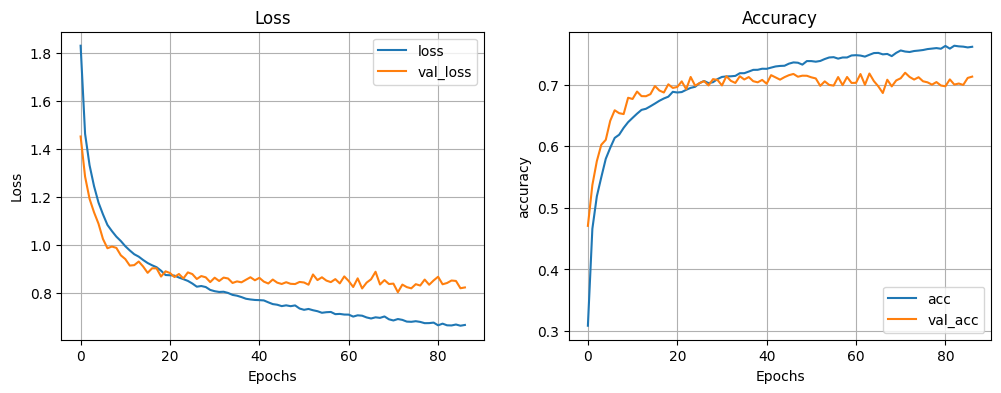

In [70]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1, 2, figsize=(12, 4))
    metrics[["loss", "val_loss"]].plot(
        ax=ax[0], title="Loss", grid=True, xlabel="Epochs", ylabel="Loss"
    )
    metrics[["acc", "val_acc"]].plot(
        ax=ax[1], title="Accuracy", grid=True, xlabel="Epochs", ylabel="accuracy"
    )


plot_metrics(metrics)

## Hyperparameter tuning
- dropout rate
- learning rate
- different network configurations
- which type of pooling layer
- different optimizers
- ...

we pick dropout to tune

In [71]:
# short patience for demo 
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=3)

def evaluate_model(**kwargs):
    model = cnn_model(**kwargs)
    # few epochs for demo
    model.fit(
        scaled_X_train,
        y_train,
        epochs=10,
        callbacks=[early_stopper],
        validation_split=1 / 5,
    )

    metrics = pd.DataFrame(model.history.history)
    # gets last epochs validation accuracy
    val_acc = metrics["val_acc"].iloc[-1]

    return val_acc

In [72]:
dropout_accuracies = {}

for dropout_rate in np.arange(.1,.6,.1):
    dropout_rate = np.round(dropout_rate,1)
    dropout_accuracies[dropout_rate] = evaluate_model(dropout_rate=dropout_rate)

c:\Users\joelh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - acc: 0.4129 - loss: 1.6347 - val_acc: 0.5796 - val_loss: 1.1917
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - acc: 0.6133 - loss: 1.0952 - val_acc: 0.6323 - val_loss: 1.0698
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - acc: 0.6827 - loss: 0.9107 - val_acc: 0.6654 - val_loss: 0.9632
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - acc: 0.7291 - loss: 0.7759 - val_acc: 0.6792 - val_loss: 0.9535
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - acc: 0.7703 - loss: 0.6490 - val_acc: 0.6930 - val_loss: 0.9168
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - acc: 0.8098 - loss: 0.5488 - val_acc: 0.7037 - val_loss: 0.9440
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - acc: 0.8416 - loss: 0.4567 - val_acc: 0.6960 - val_loss: 1.0051
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 28ms/step - acc: 0.8688 - loss: 0.3802 - val_acc: 0.6966 - val_loss: 1.0092
Epoch 1/10
1250/1250 ━━━